In [1]:
import numpy as np
import nengo
from nengo import Lowpass
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io
from network_revised import DotPerception, build_network
palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='ticks', rc={'font.size':12, 'mathtext.fontset': 'cm'})

In [46]:
def make_hanks_behavior_dataframe():
    # convert original matlab files into a single pandas dataframe
    dfs = []
    columns = ('type', 'id', 'emphasis', 'trial', 'coherence', 'accuracy', 'RT')

    for name in ['E', 'D']:
        if name=='E': emp = scipy.io.loadmat("data/behavData_eli.mat", simplify_cells=True)
        if name=='D': emp = scipy.io.loadmat("data/behavData_dam.mat", simplify_cells=True)
        for e, emphasis in enumerate(['speed', 'accuracy']):
            cond = emp['task'][e]
            coherences = 100*cond['data']['coh']
            accuracies = 100*cond['data']['cor']
            rts = 0.001*cond['data']['rt']
            trials = coherences.shape[0]
            for t in range(trials):
                dfs.append(pd.DataFrame([['monkey', name, emphasis, t, coherences[t], accuracies[t], rts[t]]], columns=columns))

    hanks_behavior = pd.concat(dfs, ignore_index=True)
    hanks_behavior.to_pickle("data/hanks2014_behavior.pkl")

In [47]:
make_hanks_behavior_dataframe()

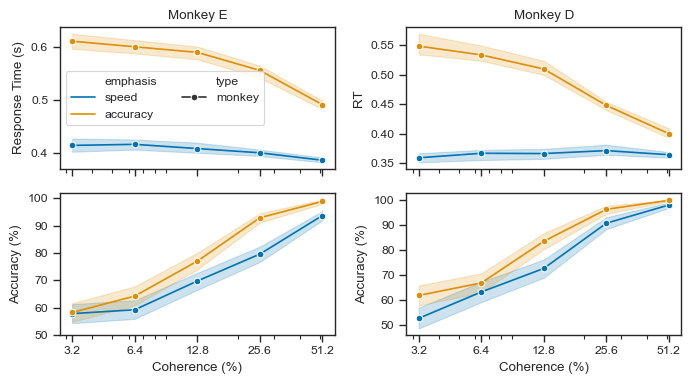

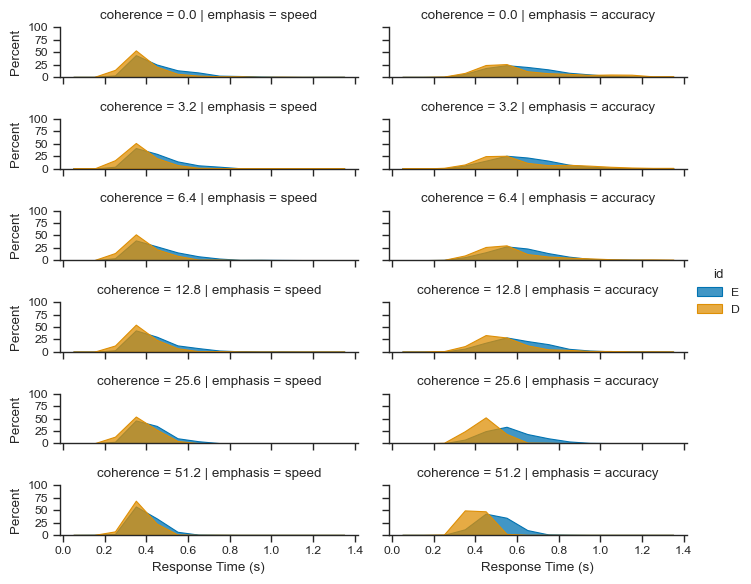

In [55]:
hanks_behavior = pd.read_pickle("data/hanks2014_behavior.pkl")
cohs = 100*np.array([0.032, 0.064, 0.128, 0.256, 0.512])
error = ('ci', 95)
estimator = np.median
bins = np.arange(0, 1.5, 0.1)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=((7.08, 4)))
for pid, name in enumerate(['E', 'D']):
    sns.lineplot(data=hanks_behavior.query("id==@name & coherence>0"), x='coherence', y='RT', hue='emphasis',
                 palette=palette[:2], markers=True, ax=axes[0][pid],
                 style='type', errorbar=error, estimator=estimator)
    sns.lineplot(data=hanks_behavior.query("id==@name & coherence>0"), x='coherence', y='accuracy', hue='emphasis',
                 style='type', palette=palette[:2], markers=True, ax=axes[1][pid])
    axes[0][pid].set(title=f"Monkey {name}")
axes[0][0].set(ylabel="Response Time (s)")
axes[0][0].legend(ncols=2)
axes[1][0].set(xscale='log', xticks=cohs, xticklabels=cohs, xlabel="Coherence (%)", ylabel="Accuracy (%)", yticks=[50,60,70,80,90,100])
axes[1][1].set(xscale='log', xticks=cohs, xticklabels=cohs, xlabel="Coherence (%)", ylabel="Accuracy (%)", yticks=[50,60,70,80,90,100])
axes[0][1].get_legend().remove()
axes[1][0].get_legend().remove()
axes[1][1].get_legend().remove()
plt.tight_layout()
fig.savefig(f"plots/compare_hanks_SAT.svg")
fig.savefig(f"plots/compare_hanks_SAT.png", dpi=600)

fig = sns.FacetGrid(hanks_behavior, col='emphasis', row="coherence", hue='id', palette=palette[:2], height=1, aspect=3.5, sharex=True, legend_out=True)
fig.map_dataframe(sns.histplot, x="RT", stat='percent', element="poly", common_norm=False, bins=bins)
fig.set_xlabels("Response Time (s)")
fig.set(xticks=bins[::2])
fig.set(yticks=[0,25,50,75,100])
fig.add_legend()
fig.savefig(f"plots/churchland_hanks_RTs.svg")
fig.savefig(f"plots/churchland_hanks_RTs.png", dpi=600)

# Firing Rates

In [57]:
emp = scipy.io.loadmat("data/psthData.mat", simplify_cells=True)

In [59]:
print(emp['psth_forBo_acc'])

[array([0.49422716, 0.49085719, 0.49587943, 0.49703853, 0.5015897 ,
        0.50023628, 0.50040308, 0.49899374, 0.50297168, 0.50004489,
        0.49884631, 0.49238798, 0.49643175, 0.49159256, 0.49441324,
        0.49595513, 0.49652925, 0.49735499, 0.49658581, 0.49627981,
        0.49708807, 0.49675536, 0.49969456, 0.50751908, 0.50321686,
        0.50131039, 0.50650319, 0.50601753, 0.50376688, 0.5114234 ,
        0.51246178, 0.51151864, 0.5109518 , 0.5147092 , 0.51397316,
        0.514899  , 0.51257124, 0.51247696, 0.5084039 , 0.50746274,
        0.51285451, 0.50825977, 0.50344913, 0.50024061, 0.49814666,
        0.49701748, 0.49268127, 0.49365546, 0.4916715 , 0.49374132,
        0.49269565, 0.48685576, 0.49342683, 0.48966903, 0.48265085,
        0.48563856, 0.48719546, 0.48768083, 0.48769841, 0.4856175 ,
        0.48570259, 0.49312682, 0.48669581, 0.48691138, 0.48169401,
        0.48513605, 0.48271444, 0.48539885, 0.48299837, 0.48087909,
        0.47481328, 0.47576496, 0.46833252, 0.46

In [61]:
print(emp['psth_forBo_sp'])

[array([0.55520675, 0.558416  , 0.55622953, 0.54862267, 0.5481606 ,
        0.54542875, 0.55233451, 0.55113296, 0.54793915, 0.55480764,
        0.55442526, 0.55517368, 0.53984371, 0.53277037, 0.53594522,
        0.54558388, 0.54448474, 0.55094947, 0.55007023, 0.55487108,
        0.55211418, 0.54679348, 0.54803718, 0.55087883, 0.55749825,
        0.55978431, 0.5536097 , 0.5567085 , 0.55362257, 0.54382029,
        0.54578703, 0.54468293, 0.53903066, 0.54013855, 0.55287144,
        0.54978481, 0.55902315, 0.55695269, 0.56014663, 0.56125083,
        0.56044635, 0.55582744, 0.56198139, 0.57254938, 0.57436381,
        0.57508995, 0.57352792, 0.57899158, 0.57731031, 0.58007598,
        0.57838039, 0.58038126, 0.58106891, 0.5816387 , 0.58007543,
        0.57613784, 0.5677441 , 0.57836524, 0.58136727, 0.57804425,
        0.57828152, 0.57250146, 0.57758015, 0.58555692, 0.58356932,
        0.57889743, 0.57798252, 0.57889699, 0.57994191, 0.57229455,
        0.57501218, 0.58043399, 0.58152951, 0.59

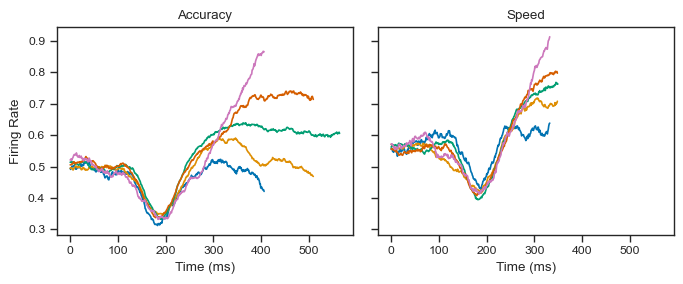

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((7, 3)), sharey=True, sharex=True)
sns.lineplot(emp['psth_forBo_acc'][0], color=palette[0], ax=axes[0])
sns.lineplot(emp['psth_forBo_acc'][1], color=palette[1], ax=axes[0])
sns.lineplot(emp['psth_forBo_acc'][2], color=palette[2], ax=axes[0])
sns.lineplot(emp['psth_forBo_acc'][3], color=palette[3], ax=axes[0])
sns.lineplot(emp['psth_forBo_acc'][4], color=palette[4], ax=axes[0])
sns.lineplot(emp['psth_forBo_sp'][0], color=palette[0], ax=axes[1])
sns.lineplot(emp['psth_forBo_sp'][1], color=palette[1], ax=axes[1])
sns.lineplot(emp['psth_forBo_sp'][2], color=palette[2], ax=axes[1])
sns.lineplot(emp['psth_forBo_sp'][3], color=palette[3], ax=axes[1])
sns.lineplot(emp['psth_forBo_sp'][4], color=palette[4], ax=axes[1])
axes[0].set(ylabel='Firing Rate', xlabel='Time (ms)', title='Accuracy')
axes[1].set(xlabel='Time (ms)', title='Speed')
plt.tight_layout()
fig.savefig(f"plots/hanks_psth.png", dpi=600)